In [1]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import graphviz

# Preparing the data sets

In [2]:
col_names = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health", "class_values"]
mapping = {
    'parents': {'usual': 0, 'pretentious': 1, 'great_pret': 2},
    'has_nurs': {'proper': 0, 'less_proper': 1, 'improper': 2, 'critical': 3, 'very_crit': 4},
    'form': {'complete': 0, 'completed': 1, 'incomplete': 2, 'foster': 3},
    'children': {'1': 1, '2': 2, '3': 3, 'more': 4},
    'housing': {'convenient': 0, 'less_conv': 1, 'critical': 2},
    'finance': {'convenient': 0, 'inconv': 1},
    'social': {'nonprob': 0, 'slightly_prob': 1, 'problematic': 2},
    'health': {'recommended': 0, 'priority': 1, 'not_recom': 2},
    'class_values': {'not_recom': 0, 'recommend': 1, 'very_recom': 2, 'priority': 3, 'spec_prior': 4}
}
datasets = pd.read_csv('nursery.data.csv', names=col_names)

datasets = datasets.replace(mapping)
datasets = datasets.to_numpy()

label = datasets[:, -1]
datasets = datasets[:, :-1]


subsets = []
subsets.append(train_test_split(datasets, label,test_size = 0.6, train_size = 0.4, shuffle = True, random_state = 0)) # 40/60
subsets.append(train_test_split(datasets, label,test_size = 0.4, train_size = 0.6, shuffle = True, random_state = 0)) # 60/40
subsets.append(train_test_split(datasets, label,test_size = 0.2, train_size = 0.8, shuffle = True, random_state = 0)) # 80/20
subsets.append(train_test_split(datasets, label,test_size = 0.1, train_size = 0.9, shuffle = True, random_state = 0)) # 90/10

# dataset visualization

In [3]:
feature_names = ["parents", "has_nurs", "form", "children", "housing", "finance", "social", "health"]
class_names= ['not_recom', 'recommend', 'very_recom', 'priority', 'spec_prior']
def draw_plot(original, train, test, title):
    count_org = pd.DataFrame(original).value_counts()
    count_train = pd.DataFrame(train).value_counts()
    count_test = pd.DataFrame(test).value_counts()

    frame = pd.DataFrame({'original': count_org, 'train': count_train, 'test': count_test})

    plot = frame.plot(kind='bar', xlabel="Classes", ylabel="Count", title=title, color=['#a83232','#3aa832','#3236a8'])
    plot.bar_label(plot.containers[0])
    plot.set_xticklabels(class_names, rotation='vertical')

    plt.show()

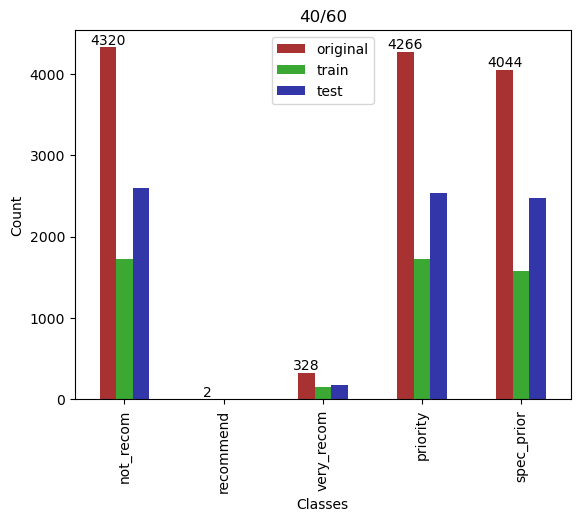

In [4]:
draw_plot(label, subsets[0][2], subsets[0][3], '40/60') # 40/60 

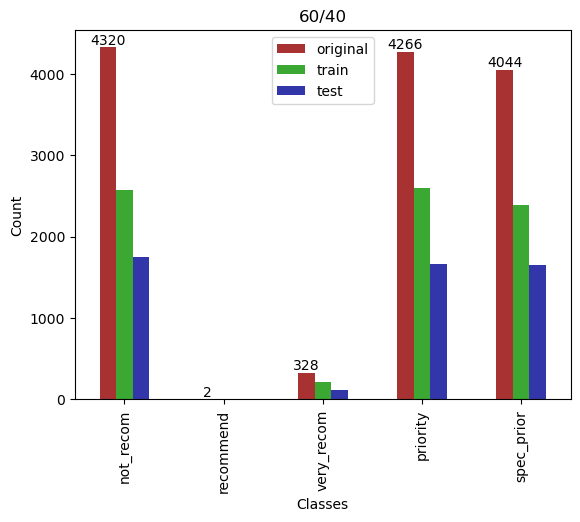

In [5]:
draw_plot(label, subsets[1][2], subsets[1][3], '60/40') # 60/40

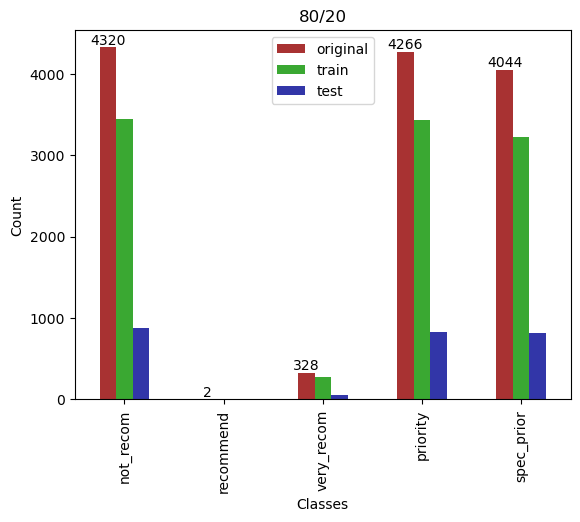

In [6]:
draw_plot(label, subsets[2][2], subsets[2][3], '80/20') # 80/20 

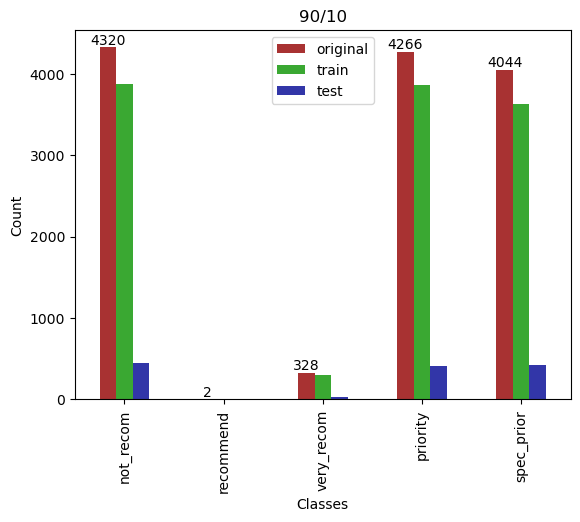

In [7]:
draw_plot(label, subsets[3][2], subsets[3][3], '90/10') # 80/20 

# Building the decision tree classifiers

In [8]:
trees = [None] * 4

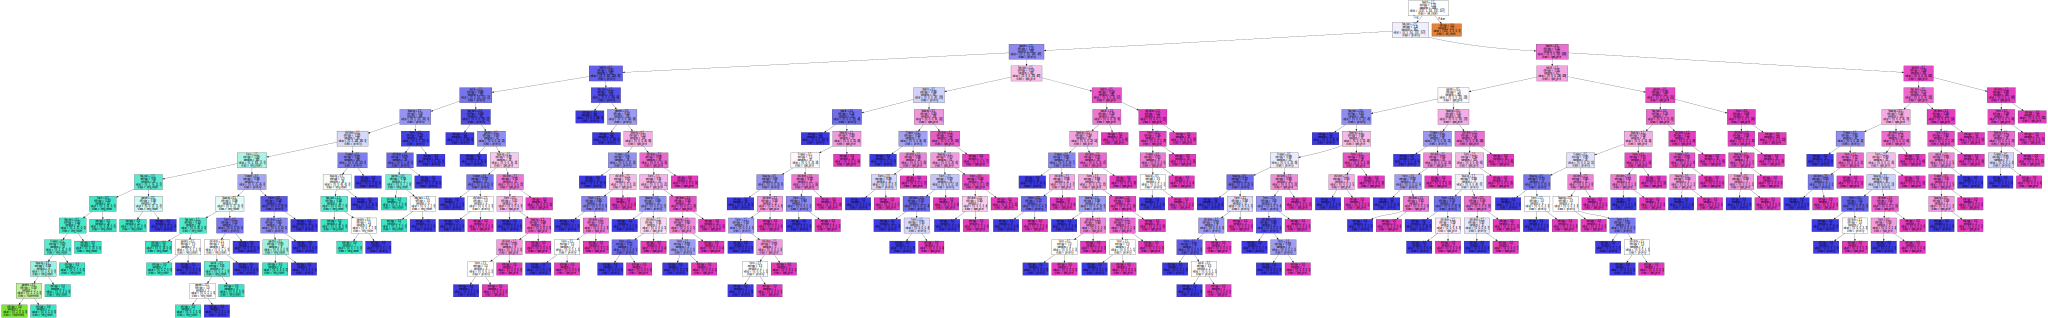

In [10]:
# 40/60
feature_train, feature_test, label_train, label_test = subsets[0]
trees[0] = DecisionTreeClassifier(criterion='entropy')
trees[0].fit(feature_train, label_train)
data = tree.export_graphviz(trees[0], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = None, special_characters = True)
graph = graphviz.Source(data)
graph

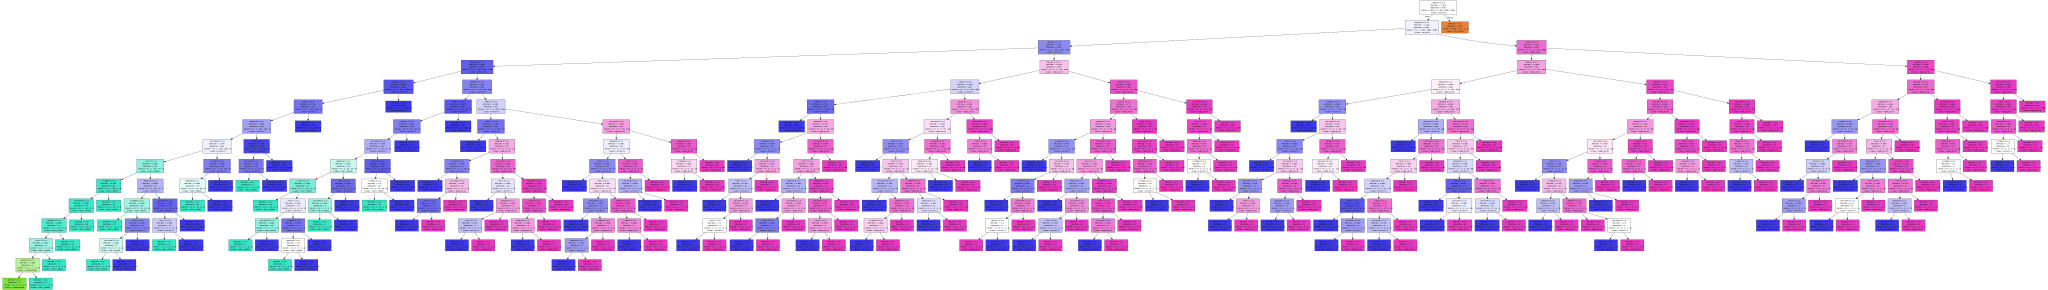

In [11]:
#60/40
feature_train, feature_test, label_train, label_test = subsets[1]
trees[1] = DecisionTreeClassifier(criterion='entropy')
trees[1].fit(feature_train, label_train.ravel())
data = tree.export_graphviz(trees[1], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = None, special_characters = True)
graph = graphviz.Source(data)
graph

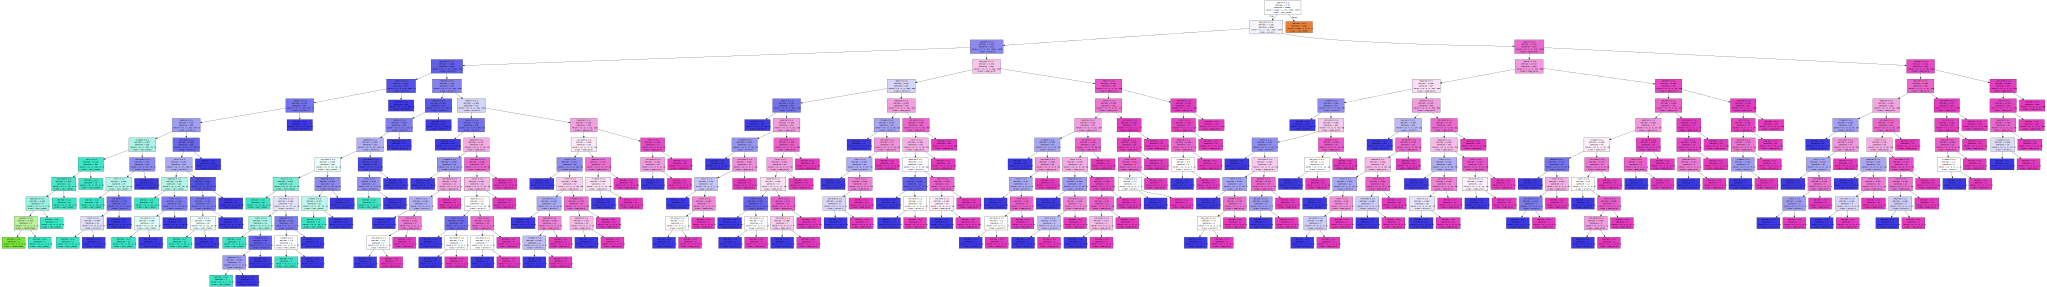

In [12]:
#80/20
feature_train, feature_test, label_train, label_test = subsets[2]
trees[2] = DecisionTreeClassifier(criterion='entropy')
trees[2].fit(feature_train, label_train.ravel())
data = tree.export_graphviz(trees[2], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = None, special_characters = True)
graph = graphviz.Source(data)
graph

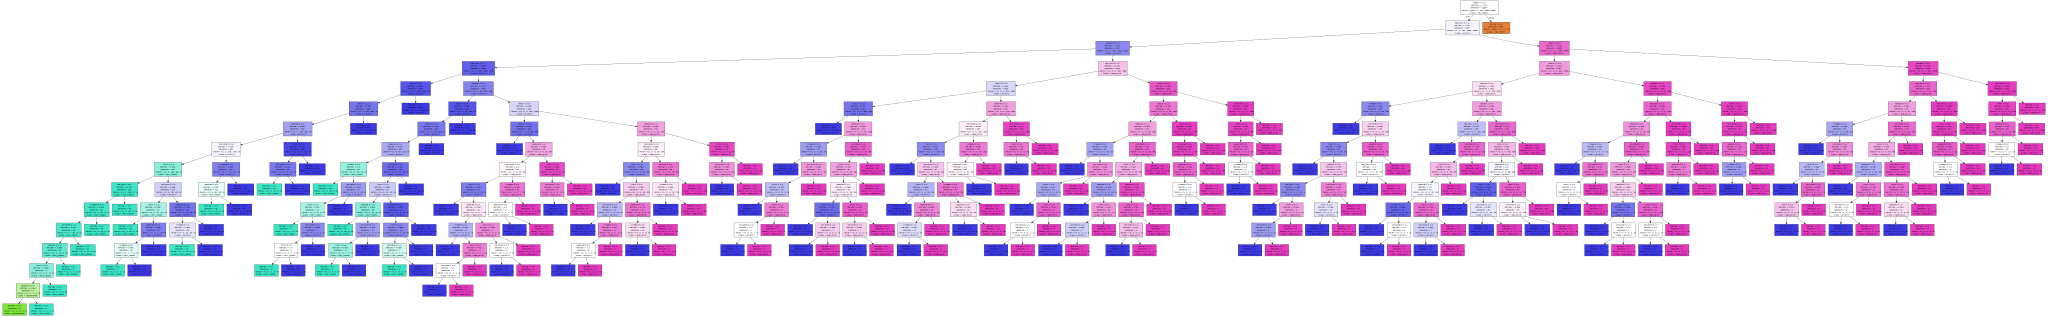

In [13]:
#90/10 
feature_train, feature_test, label_train, label_test = subsets[3]
trees[3] = DecisionTreeClassifier(criterion='entropy')
trees[3].fit(feature_train, label_train.ravel())
data = tree.export_graphviz(trees[3], out_file = None, feature_names = feature_names, class_names = class_names, filled = True, max_depth = None, special_characters = True)
graph = graphviz.Source(data)
graph

# Evaluating the decision tree classifiers

In [14]:
#40/60
feature_test_40 = subsets[0][1]
label_test_40 = subsets[0][3]
label_pred_40 = trees[0].predict(feature_test_40)
print(classification_report(label_test_40, label_pred_40, target_names = class_names, labels=np.unique(label), zero_division = 0))

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2593
   recommend       0.00      0.00      0.00         0
  very_recom       0.99      0.93      0.96       177
    priority       0.98      0.99      0.99      2539
  spec_prior       0.99      0.99      0.99      2467

    accuracy                           0.99      7776
   macro avg       0.79      0.78      0.79      7776
weighted avg       0.99      0.99      0.99      7776



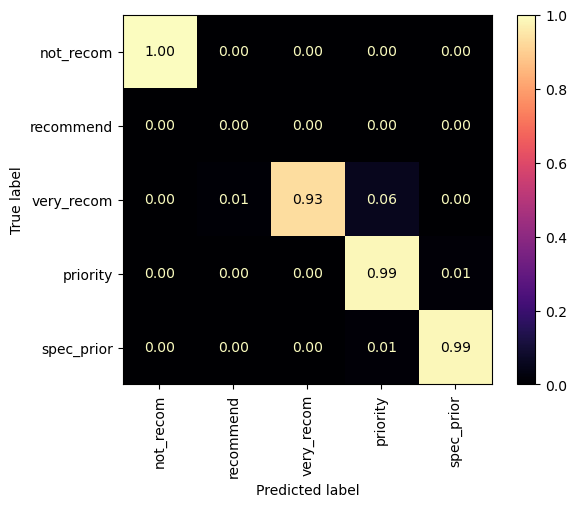

In [15]:
#40/60
disp = ConfusionMatrixDisplay.from_predictions(label_test_40, label_pred_40, display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')

In [16]:
#60/40
feature_test_60 = subsets[1][1]
label_test_60 = subsets[1][3]
label_pred_60 = trees[1].predict(feature_test_60)
print(classification_report(label_test_60, label_pred_60, target_names = class_names, labels=np.unique(label), zero_division = 0))

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1744
   recommend       0.00      0.00      0.00         0
  very_recom       1.00      0.97      0.98       119
    priority       0.99      1.00      1.00      1668
  spec_prior       1.00      0.99      1.00      1653

    accuracy                           1.00      5184
   macro avg       0.80      0.79      0.79      5184
weighted avg       1.00      1.00      1.00      5184



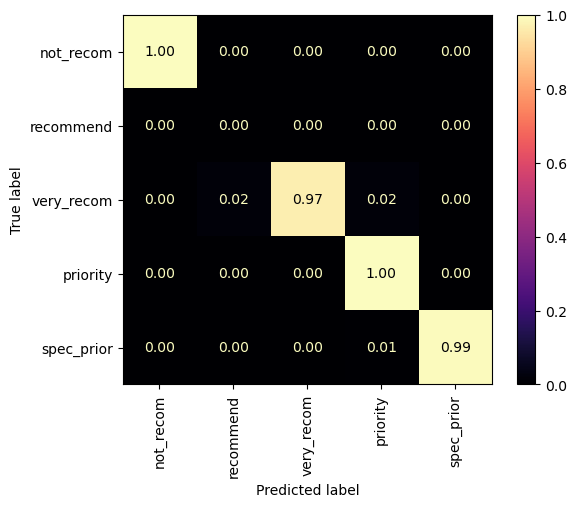

In [17]:
#60/40
disp = ConfusionMatrixDisplay.from_predictions(label_test_60, label_pred_60, display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')


In [18]:
#80/20
feature_test_80 = subsets[2][1]
label_test_80 = subsets[2][3]
label_pred_80 = trees[2].predict(feature_test_80)
print(classification_report(label_test_80, label_pred_80, target_names = class_names, labels=np.unique(label), zero_division = 0))

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       882
   recommend       0.00      0.00      0.00         0
  very_recom       1.00      1.00      1.00        57
    priority       1.00      1.00      1.00       833
  spec_prior       1.00      1.00      1.00       820

   micro avg       1.00      1.00      1.00      2592
   macro avg       0.80      0.80      0.80      2592
weighted avg       1.00      1.00      1.00      2592



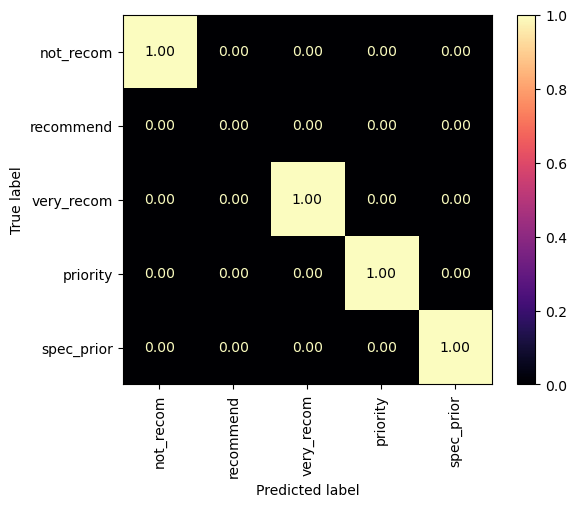

In [19]:
#80/20
disp = ConfusionMatrixDisplay.from_predictions(label_test_80, label_pred_80,labels=np.unique(label), display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')

In [20]:
#90/10
feature_test_90 = subsets[3][1]
label_test_90 = subsets[3][3]
label_pred_90 = trees[3].predict(feature_test_90)
print(classification_report(label_test_90, label_pred_90, target_names = class_names, labels=np.unique(label), zero_division = 0))

              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       443
   recommend       0.00      0.00      0.00         0
  very_recom       1.00      1.00      1.00        25
    priority       1.00      1.00      1.00       410
  spec_prior       1.00      1.00      1.00       418

   micro avg       1.00      1.00      1.00      1296
   macro avg       0.80      0.80      0.80      1296
weighted avg       1.00      1.00      1.00      1296



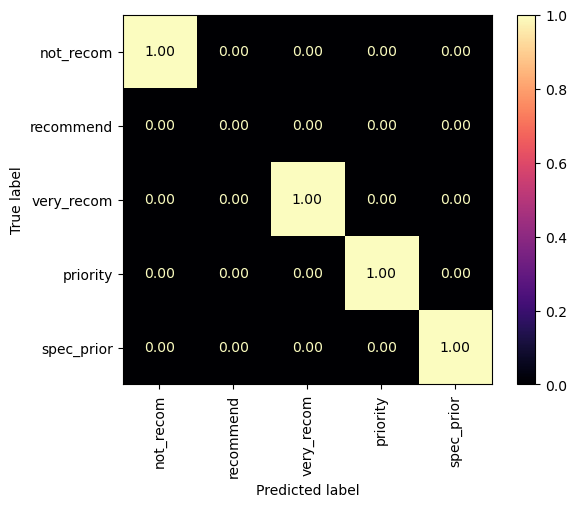

In [21]:
#90/10
disp = ConfusionMatrixDisplay.from_predictions(label_test_90, label_pred_90,labels=np.unique(label), display_labels = class_names, xticks_rotation = 'vertical', values_format = '.2f', normalize = 'true', cmap = 'magma')


# The depth and accuracy of a decision tree

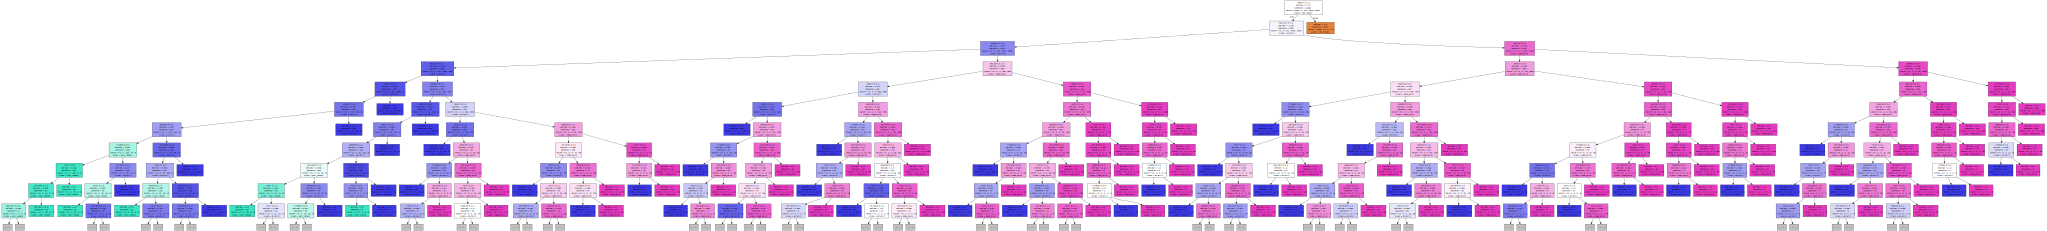

In [22]:
#In this example we use the 80/20 dataset with max depth from None to 2, 3, 4, 5, 6 and 7
feature_train, feature_test, label_train, label_test = subsets[2]
#Max depth = None
tree_depth_none = DecisionTreeClassifier(criterion='entropy')
tree_depth_none.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_none, out_file = None, feature_names = feature_names, class_names=class_names, filled=True, max_depth = 10, special_characters = True)
graph = graphviz.Source(data)
graph


In [23]:
label_depth_none = tree_depth_none.predict(feature_test)
accuracy_score(label_test, label_depth_none)

0.9984567901234568

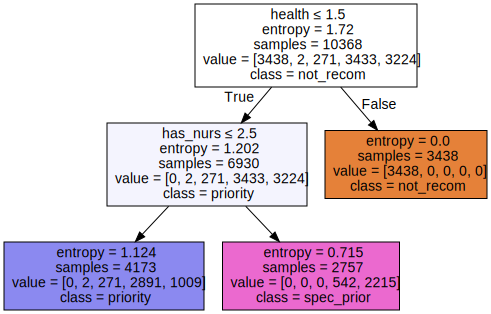

In [24]:
#Max depth = 2
tree_depth_2 = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
tree_depth_2.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_2, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [25]:
label_depth_2 = tree_depth_2.predict(feature_test)
accuracy_score(label_test, label_depth_2)

0.8294753086419753

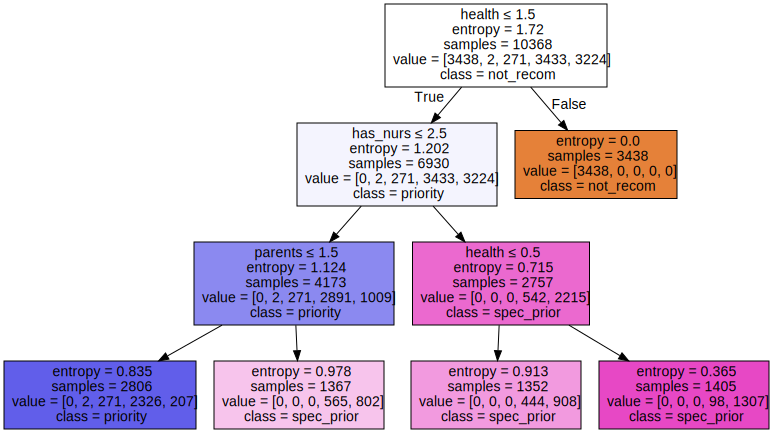

In [26]:
#Max depth = 3
tree_depth_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
tree_depth_3.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_3, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [27]:
label_depth_3 = tree_depth_3.predict(feature_test)
accuracy_score(label_test, label_depth_3)

0.8506944444444444

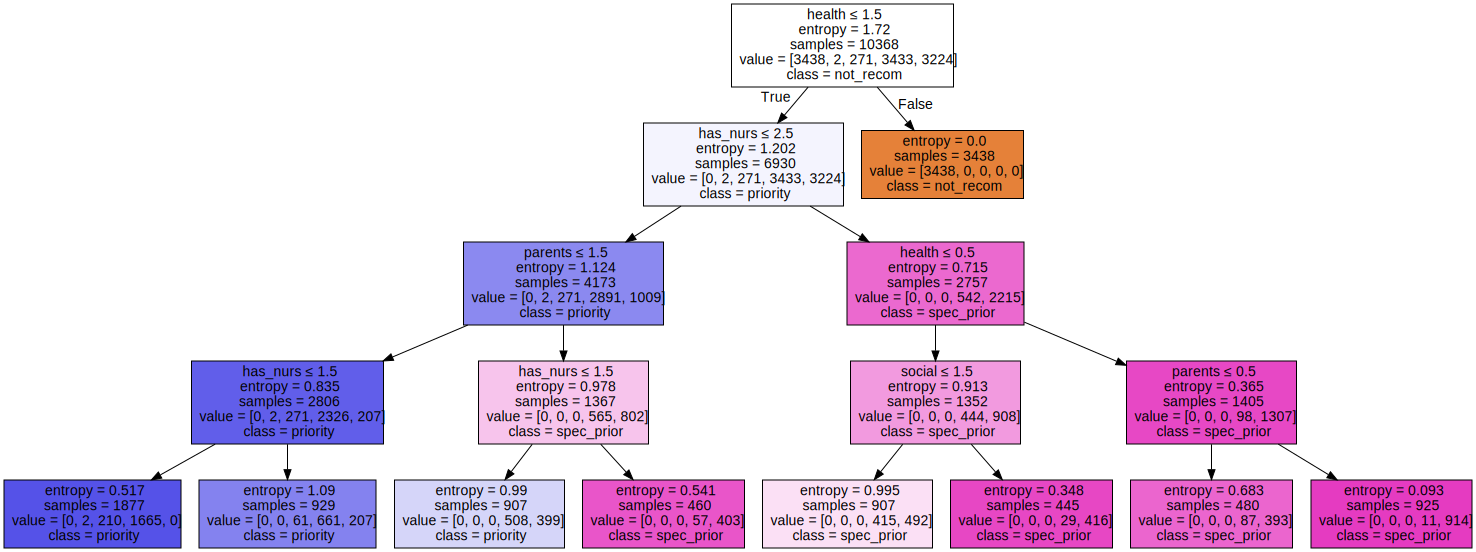

In [28]:
#Max depth = 4
tree_depth_4 = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
tree_depth_4.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_4, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [29]:
label_depth_4 = tree_depth_4.predict(feature_test)
accuracy_score(label_test, label_depth_4)

0.8641975308641975

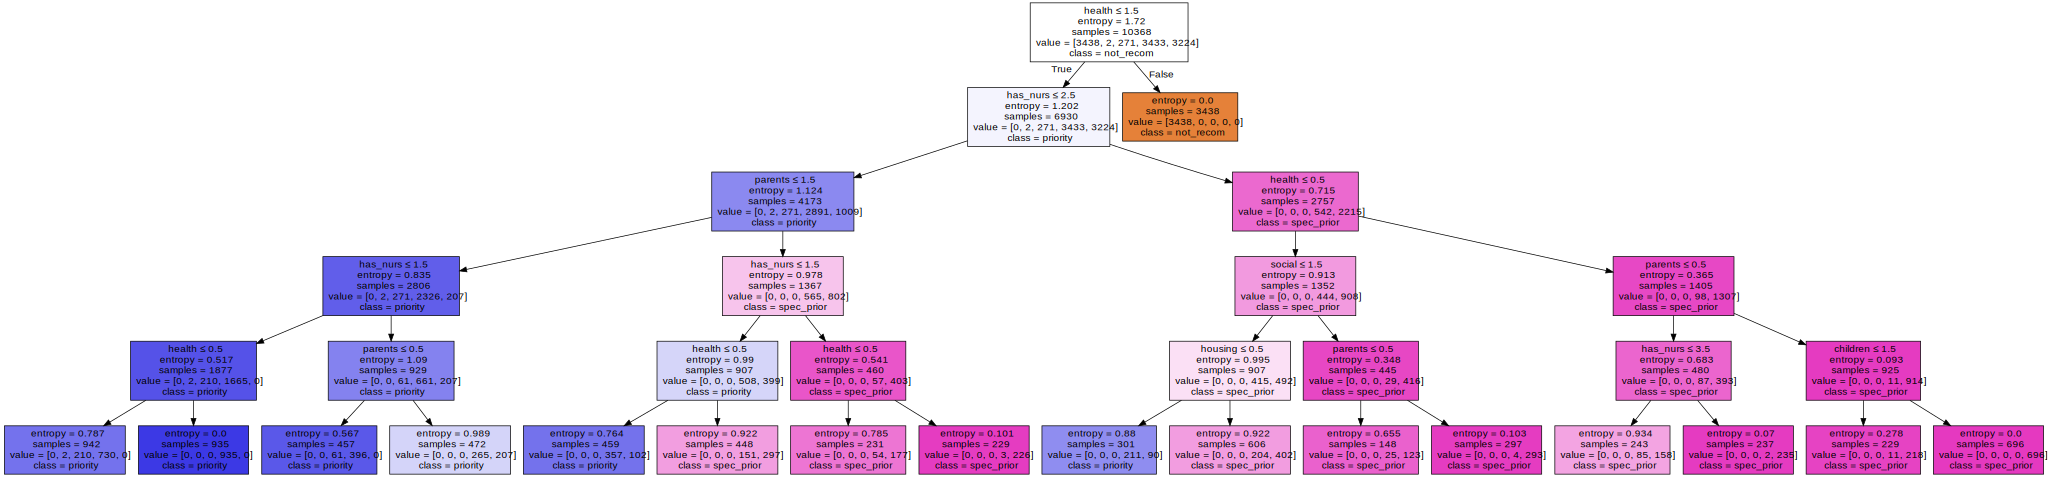

In [30]:
#Max depth = 5
tree_depth_5 = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
tree_depth_5.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_5, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [31]:
label_depth_5 = tree_depth_5.predict(feature_test)
accuracy_score(label_test, label_depth_5)

0.8939043209876543

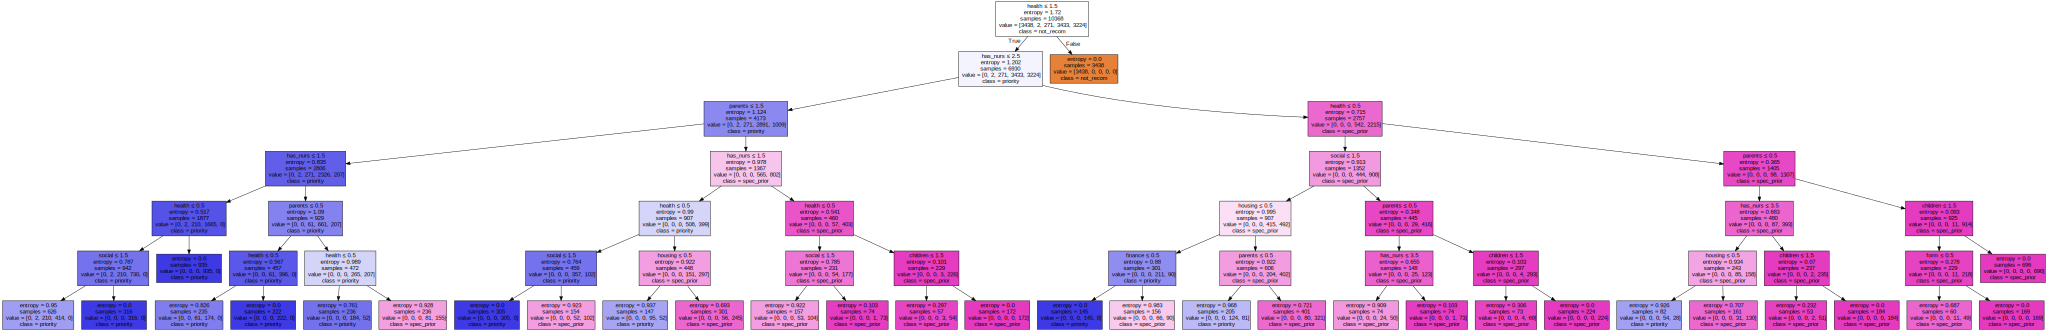

In [32]:
#Max depth = 6
tree_depth_6 = DecisionTreeClassifier(criterion='entropy', max_depth = 6)
tree_depth_6.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_6, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [33]:
label_depth_6 = tree_depth_6.predict(feature_test)
accuracy_score(label_test, label_depth_6)

0.9155092592592593

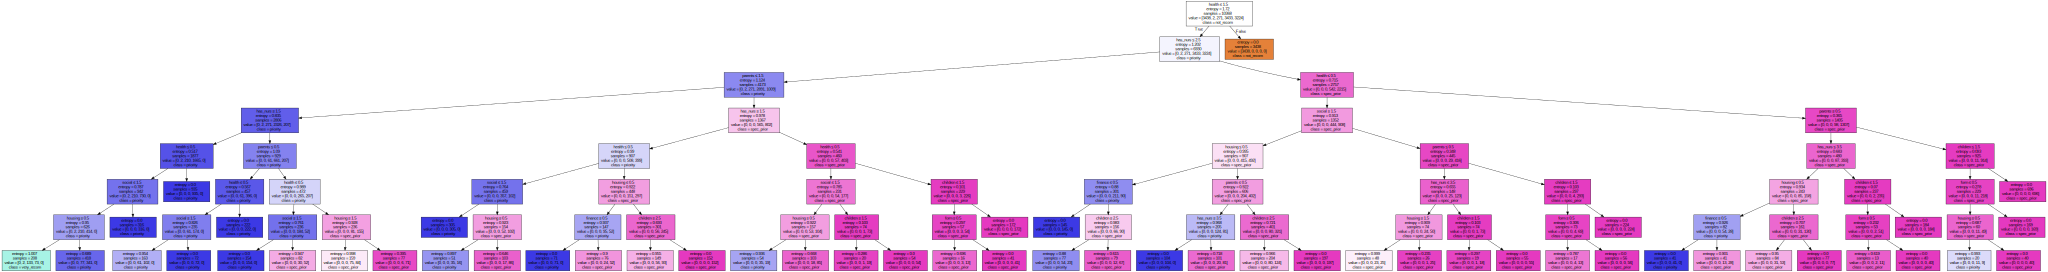

In [34]:
#Max depth = 7
tree_depth_7 = DecisionTreeClassifier(criterion='entropy', max_depth = 7)
tree_depth_7.fit(feature_train, label_train.ravel())
data = tree.export_graphviz(tree_depth_7, out_file = None, feature_names = feature_names, class_names = class_names, filled = True, special_characters = True)
graph = graphviz.Source(data)
graph

In [35]:
label_depth_7 = tree_depth_7.predict(feature_test)
accuracy_score(label_test, label_depth_7)

0.9402006172839507